### 岗位分析的目的

常做岗位分析，面试不会心虚。
——鲁迅


这次的岗位分析主要目的如下：
- 了解目前市场需求
- 了解目标岗位的职责&要求&薪资水平
- 分析目前是不是值得跳槽
- 分析目前值得跳槽的行业
- 锁定高度感兴趣公司&岗位
- 分析工资多少比较合适
- 确定在面试前需要着重复习&学习的知识点
- 增加项目分析经验
- 制作通用分析模板&工具

#### 了解目前市场需求

思路：
岗位需求最好的量化标准是利用招聘网站的后台数据，通过不同岗位在一定时间内的发布数量趋势，得到该岗位的相对市场需求状态。

由于此类数据较难获取，因此本次分析换个思路。理论上，岗位的热度和岗位的需求呈正比，符合供求关系。岗位的热度是来自于供求双方的，因此使用常用的“百度指数”以及“微信指数”等工具，可以比较客观地看到目前岗位的热度，从而推断出岗位目前的相对市场需求。



In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.font_manager import FontProperties
import wordcloud as wc
import jieba as jb
from string import punctuation

In [2]:
# setting
my_font = FontProperties(fname=r"/System/Library/Fonts/STHeiti Medium.ttc",size=10)
sns.set(style="dark", context="notebook", font=my_font.get_name())
%matplotlib inline

In [3]:
# read data
job_table = pd.read_csv("/Users/llx/PyProjects/job_wizard/数据分析_20200211.csv")

In [4]:
# overview
job_table.size

5610

In [5]:
job_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 22 columns):
Add_Date           255 non-null int64
Add_Time           255 non-null object
Advantage          255 non-null object
Company            255 non-null object
Degree             255 non-null object
Description        255 non-null object
Experience         255 non-null object
Finance            255 non-null object
Highlights         255 non-null object
If_Intern          255 non-null int64
Income_Max(k)      255 non-null int64
Income_Mid(k)      255 non-null float64
Income_Min(k)      255 non-null int64
Income_Range(k)    255 non-null object
Industry           255 non-null object
Location           255 non-null object
Path               255 non-null object
Size               255 non-null object
Sys_Date           255 non-null int64
Sys_Time           255 non-null object
Tags               255 non-null object
Title              255 non-null object
dtypes: float64(1), int64(5), object(16)


In [6]:
job_table.describe()

,Add_Date,If_Intern,Income_Max(k),Income_Mid(k),Income_Min(k),Sys_Date
count,2.550000e+02,255.000000,255.000000,255.000000,255.000000,2.550000e+02
mean,2.019983e+07,0.047059,25.196078,19.827451,14.458824,2.020021e+07
std,1.742356e+03,0.212181,14.069596,10.789213,7.749858,5.005169e-01
min,2.019122e+07,0.000000,1.000000,1.000000,1.000000,2.020021e+07
25%,2.020012e+07,0.000000,15.000000,12.500000,10.000000,2.020021e+07
50%,2.020021e+07,0.000000,25.000000,19.000000,15.000000,2.020021e+07
75%,2.020021e+07,0.000000,30.000000,25.000000,20.000000,2.020021e+07
max,2.020021e+07,1.000000,80.000000,65.000000,50.000000,2.020021e+07


In [7]:
# data preprocessing
salary_bins = [x*5 for x in range(20)]
income_stats = ["Max", "Mid", "Min"]

for income_stat in income_stats:
    job_table["Desc_"+income_stat+"_Inc"] = pd.cut(job_table["Income_"+income_stat+"(k)"], bins=salary_bins)

job_table["Desc_Industry"] = job_table["Industry"].str.split(",").str[0]

job_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 26 columns):
Add_Date           255 non-null int64
Add_Time           255 non-null object
Advantage          255 non-null object
Company            255 non-null object
Degree             255 non-null object
Description        255 non-null object
Experience         255 non-null object
Finance            255 non-null object
Highlights         255 non-null object
If_Intern          255 non-null int64
Income_Max(k)      255 non-null int64
Income_Mid(k)      255 non-null float64
Income_Min(k)      255 non-null int64
Income_Range(k)    255 non-null object
Industry           255 non-null object
Location           255 non-null object
Path               255 non-null object
Size               255 non-null object
Sys_Date           255 non-null int64
Sys_Time           255 non-null object
Tags               255 non-null object
Title              255 non-null object
Desc_Max_Inc       255 non-null category


In [8]:
job_table.head()

,Add_Date,Add_Time,Advantage,Company,Degree,Description,Experience,Finance,Highlights,If_Intern,...,Path,Size,Sys_Date,Sys_Time,Tags,Title,Desc_Max_Inc,Desc_Mid_Inc,Desc_Min_Inc,Desc_Industry
0,20200210,14:57,"大神指导,高配团队,年终奖,带薪旅行",乐易网络,本科,乐易网络是一家数据驱动的手游公司，诚邀您作为数据分析工程师加入我们的数据平台团队，使用数据模...,经验1年以下,不需要融资,"“大神指导,高配团队,年终奖,带薪旅行”",0,...,https://www.lagou.com/jobs/5195111.html?show=d...,150-500人,20200210,22:46:58,游戏 SQL,数据分析,"(15, 20]","(10, 15]","(5, 10]",移动互联网
1,20200210,14:44,顶尖的项目团队可以让你得到快速成长,YIDATEC,大专,岗位职责：\n1、业务数据提取、专项分析\n2、业务日常报表的维护，开发相关工作\n\n岗位...,经验1-3年,不需要融资,“顶尖的项目团队可以让你得到快速成长”,0,...,https://www.lagou.com/jobs/6739447.html?show=d...,2000人以上,20200210,22:47:32,SQL 数据库,数据分析,"(10, 15]","(10, 15]","(5, 10]",移动互联网
2,20200210,17:01,上市公司，机会多，成长快，团队氛围好,万兴科技集团股份有限公司,本科,职位描述：\n1、负责产品和用户运营数据分析，洞察挖掘转化提升点，提出方案建议，支撑运营决策...,经验3-5年,上市公司,“上市公司，机会多，成长快，团队氛围好”,0,...,https://www.lagou.com/jobs/6763020.html?show=d...,500-2000人,20200210,22:48:01,大数据 数据分析,大数据分析师,"(15, 20]","(15, 20]","(10, 15]",移动互联网
3,20200210,17:36,"世界五百强,地产龙头企,挑战大",万科,本科,岗位职责：\n1、承担公司资深大数据分析师角色，负责海量数据的深度挖掘与分析，牵头开展大数据...,经验5-10年,上市公司,"“世界五百强,地产龙头企,挑战大”",0,...,https://www.lagou.com/jobs/4674998.html?show=d...,2000人以上,20200210,22:48:36,大数据 移动互联网 数据挖掘 数据分析,大数据分析工程师,"(45, 50]","(35, 40]","(20, 25]",房产家居
4,20200210,15:26,"发展空间大,品牌影响",顺丰-丰e足食,本科,工作职责\n1． 根据业务或数据产品经理的需求实现对业务指标数据的采集、清洗、分析建模与计算...,经验3-5年,上市公司,"“发展空间大,品牌影响”",0,...,https://www.lagou.com/jobs/4971732.html?show=d...,2000人以上,20200210,22:49:13,数据挖掘 MySQL,大数据分析与挖掘工程师,"(25, 30]","(20, 25]","(15, 20]",移动互联网


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


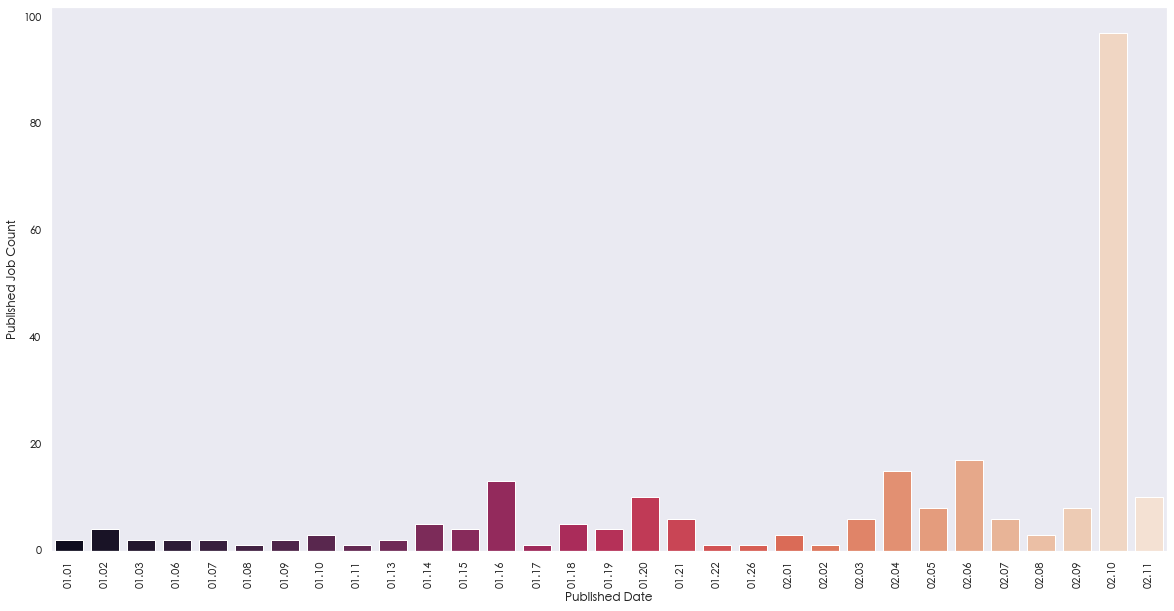

In [9]:
# Question 1
# How many of them were published in last week?
publish_cnt = job_table.groupby(["Add_Date"], as_index=False)["Path"].count().rename(columns={"Path": "count"})
publish_cnt2 = publish_cnt[publish_cnt["Add_Date"] >= 20200101]
publish_cnt2["date"] = pd.to_datetime(publish_cnt2["Add_Date"], format="%Y%m%d").dt.strftime("%m.%d")
plt.figure(figsize=(20,10))
plot_publish = sns.barplot(x="date", y="count", data=publish_cnt2, palette="rocket")
plot_publish.set_xticklabels(plot_publish.get_xticklabels(), rotation=90)
plt.xlabel("Published Date")
plt.ylabel("Published Job Count")
plt.show()

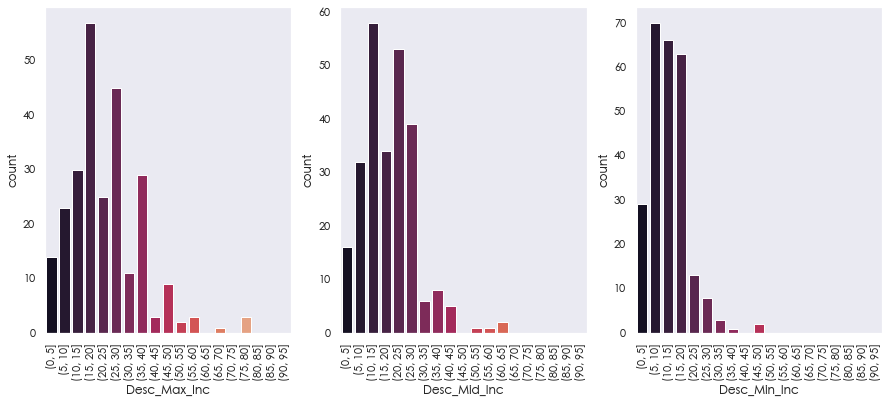

In [10]:
# Question 2
# What are the salaries of these jobs?
salary_cnt = {}
for income_stat in income_stats:
	salary_cnt[income_stat] = job_table.groupby(["Desc_"+income_stat+"_Inc"], as_index=False)["Path"].count().rename(columns={"Path": "count"})

fig, axs = plt.subplots(1, 3, figsize=(15,6))
plot_salary = {}
for index, income_stat in enumerate(income_stats):
	plot_salary[income_stat] = sns.barplot(x="Desc_"+income_stat+"_Inc", y="count", data=salary_cnt[income_stat], palette="rocket", ax=axs[index])
	plot_salary[income_stat].set_xticklabels(plot_salary[income_stat].get_xticklabels(), rotation=90)

plt.show()

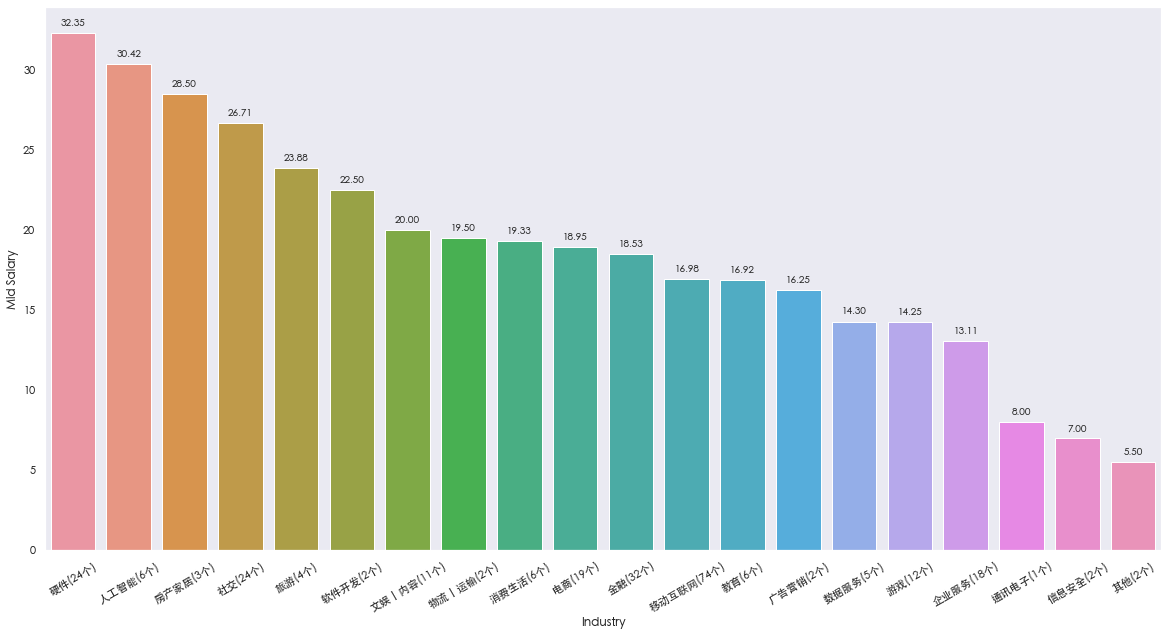

In [11]:
# Question 3
# Which industries would like to pay more?
job_table["Industry"].unique().tolist()
unique_industry = job_table["Desc_Industry"].unique().tolist()
industry_cnt = job_table.groupby(["Desc_Industry"], as_index=False)["Income_Mid(k)"].agg(["count","mean"]).reset_index().sort_values(["mean"], ascending=False)
industry_cnt["Desc_Industry2"] = industry_cnt["Desc_Industry"] + "(" + industry_cnt["count"].astype(str) + "个)"

plt.figure(figsize=(20,10))
plot_industry = sns.barplot(x="Desc_Industry2", y="mean", data=industry_cnt)

for p in plot_industry.patches:
	plot_industry.annotate(format(p.get_height(), ".2f"), (p.get_x() + p.get_width() / 2., p.get_height()), ha = "center", va = "center", xytext = (0, 10), textcoords = "offset points")

plot_industry.set_xticklabels(plot_industry.get_xticklabels(), rotation=30)

plt.xlabel("Industry")
plt.ylabel("Mid Salary")
plt.show()


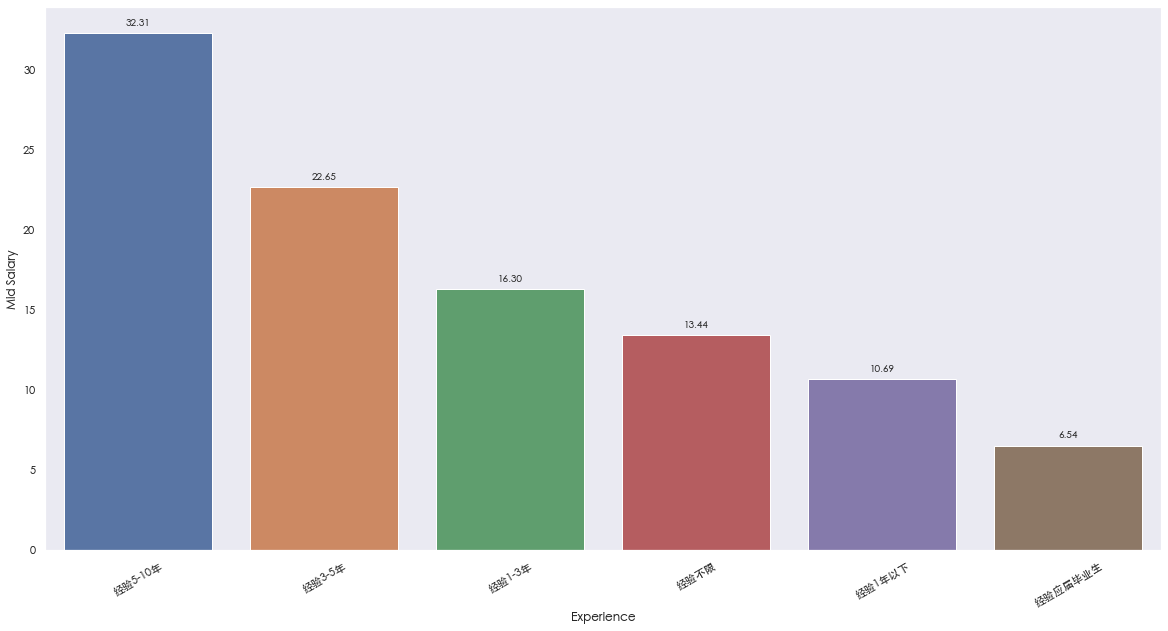

In [12]:
# Question 4
# Which types of experiences would be paad more?
job_table["Experience"].unique().tolist()
experience_cnt = job_table.groupby(["Experience"])["Income_Mid(k)"].agg(["count","mean"]).reset_index().sort_values(["mean"], ascending=False)

plt.figure(figsize=(20,10))
plot_experience = sns.barplot(x="Experience", y="mean", data=experience_cnt)

for p in plot_experience.patches:
    plot_experience.annotate(format(p.get_height(), ".2f"), (p.get_x() + p.get_width() / 2., p.get_height()), ha = "center", va = "center", xytext = (0, 10), textcoords = "offset points")

plot_experience.set_xticklabels(plot_experience.get_xticklabels(), rotation=30)

plt.xlabel("Experience")
plt.ylabel("Mid Salary")
plt.show()

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


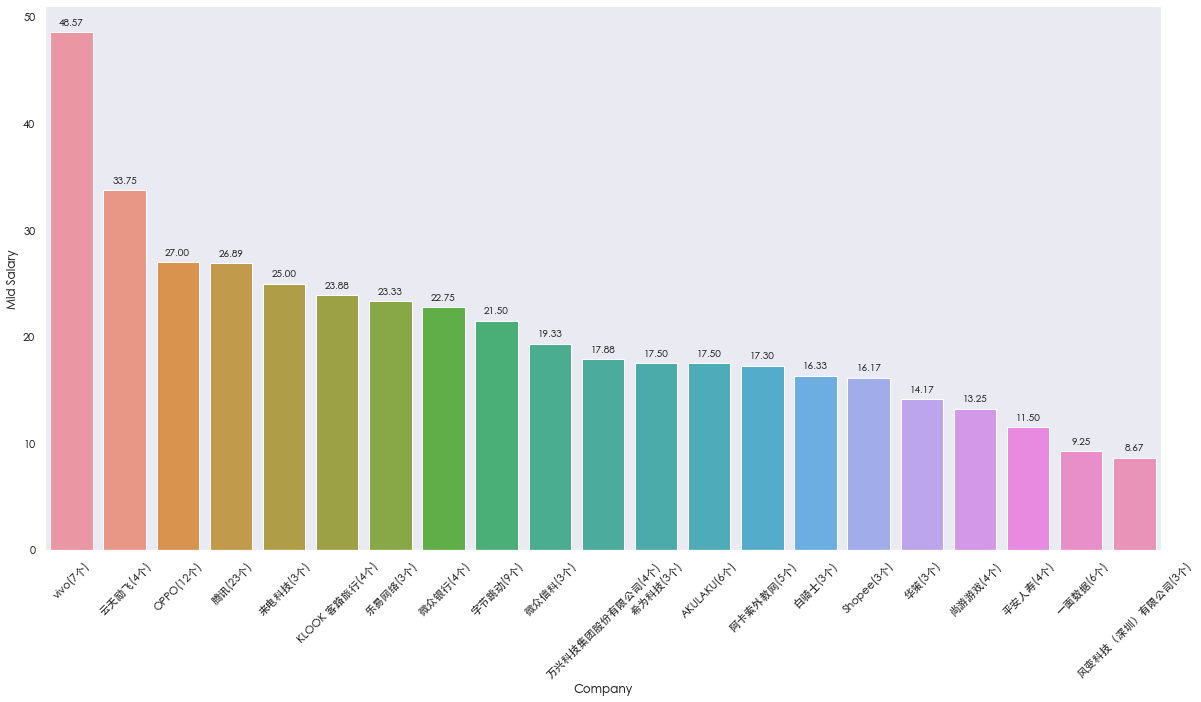

In [13]:
# Question 5
# Which companies would pay more?
job_table["Company"].unique().tolist()
company_mean = job_table.groupby(["Company"])["Income_Mid(k)"].agg(["count","mean"]).reset_index().sort_values(["mean"], ascending=False)
company_cnt = company_mean[company_mean["count"]>2]
company_cnt["Desc_Company"] = company_cnt["Company"] + "(" + company_cnt["count"].astype(str) + "个)"

plt.figure(figsize=(20,10))
plot_company = sns.barplot(x="Desc_Company", y="mean", data=company_cnt)

for p in plot_company.patches:
    plot_company.annotate(format(p.get_height(), ".2f"), (p.get_x() + p.get_width() / 2., p.get_height()), ha = "center", va = "center", xytext = (0, 10), textcoords = "offset points")

plot_company.set_xticklabels(plot_company.get_xticklabels(), rotation=45)

plt.xlabel("Company")
plt.ylabel("Mid Salary")
plt.show()

Building prefix dict from the default dictionary ...
Dumping model to file cache /var/folders/gt/jf6wkmpj5212bdg14lxl5byh0000gn/T/jieba.cache
Loading model cost 0.770 seconds.
Prefix dict has been built successfully.


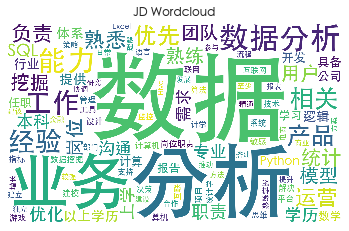

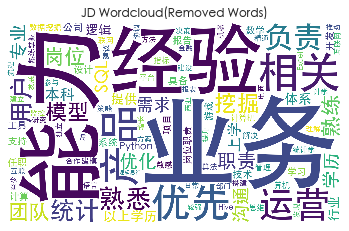

In [14]:
# Question 6
# What skills are preffered?
stopwords1 = [line.strip() for line in open(r"/Users/llx/PyProjects/job_wizard/stopwords-master/中文停用词表.txt", 'r', encoding='utf-8').readlines()]
stopwords2 = [line.strip() for line in open(r"/Users/llx/PyProjects/job_wizard/stopwords-master/哈工大停用词表.txt", 'r', encoding='utf-8').readlines()]
stopwords3 = [line.strip() for line in open(r"/Users/llx/PyProjects/job_wizard/stopwords-master/四川大学机器智能实验室停用词库.txt", 'r', encoding='utf-8').readlines()]
stopwords4 = [line.strip() for line in open(r"/Users/llx/PyProjects/job_wizard/stopwords-master/百度停用词表.txt", 'r', encoding='utf-8').readlines()]
stopwords = list(dict.fromkeys(stopwords1 + stopwords2 + stopwords3 + stopwords4))

jb_list = job_table["Description"].tolist()
jb_text = []
for jb_element in jb_list:
	jb_seg = jb.cut_for_search(jb_element)
	for jb_word in jb_seg:
		if jb_word.strip() not in stopwords:
			jb_text.append(jb_word.strip())

jb_freq = pd.DataFrame(jb_text, columns=["jb_word"])
jb_freq["cnt"] = 1
jb_group = jb_freq.groupby("jb_word").agg("count").reset_index().sort_values(["cnt"], ascending=False)
jb_group2 = jb_group[jb_group["cnt"]>20]

jb_freq2 = jb_freq.loc[jb_freq["jb_word"].str.len()>2]
jb_freq3 = jb_freq2.groupby("jb_word").count()

jb_wc = wc.WordCloud(
    font_path=r"/System/Library/Fonts/STHeiti Medium.ttc",     #字体路劲
    background_color="white",   #背景颜色
    width=1000,
    height=600,
    max_font_size=300,            #字体大小
    min_font_size=10,
    max_words=100,
    collocations=False,
    font_step=1
)

plot_jb = jb_wc.generate(" ".join(jb_text))
plt.figure(figsize=(6,6))
plt.imshow(plot_jb)
plt.axis("off")
plt.title("JD Wordcloud")
plt.show()

jb_text2 = [x for x in jb_text if x not in ["数据", "分析", "数据分析", "工作"]]
plot_jb2 = jb_wc.generate(" ".join(jb_text2))
plt.figure(figsize=(6,6))
plt.imshow(plot_jb2)
plt.axis("off")
plt.title("JD Wordcloud(Removed Words)")
plt.show()

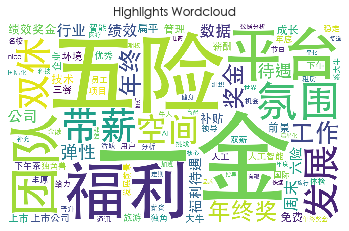

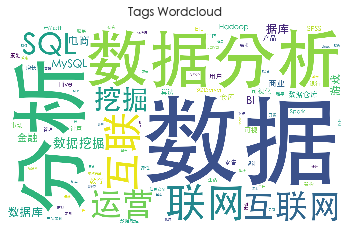

In [16]:
# Question 7
# Wordcloud for Highlights
jb_list = job_table["Highlights"].tolist()
jb_text = []
for jb_element in jb_list:
    jb_seg = jb.cut_for_search(jb_element)
    for jb_word in jb_seg:
        if jb_word.strip() not in stopwords:
            jb_text.append(jb_word.strip())

jb_freq = pd.DataFrame(jb_text, columns=["jb_word"])   

plot_jb = jb_wc.generate(" ".join(jb_text))
plt.figure(figsize=(6,6))
plt.imshow(plot_jb)
plt.axis("off")
plt.title("Highlights Wordcloud")
plt.show()
            
# Wordcloud for tags
jb_list = job_table["Tags"].tolist()
jb_text = []
for jb_element in jb_list:
    jb_seg = jb.cut_for_search(jb_element)
    for jb_word in jb_seg:
        if jb_word.strip() not in stopwords:
            jb_text.append(jb_word.strip())

jb_freq = pd.DataFrame(jb_text, columns=["jb_word"])   

plot_jb = jb_wc.generate(" ".join(jb_text))
plt.figure(figsize=(6,6))
plt.imshow(plot_jb)
plt.axis("off")
plt.title("Tags Wordcloud")
plt.show()

In [17]:
# Natural Language Processing
def chinese_word_cut(mytext):
    return " ".join(jb.cut(mytext))

jb_cut = job_table["Description"].apply(chinese_word_cut)

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
n_features = 5000
tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                max_features=n_features,
                                stop_words='english',
                                max_df = 0.5,
                                min_df = 10)
tf = tf_vectorizer.fit_transform(jb_cut)

from sklearn.decomposition import LatentDirichletAllocation
n_topics = 10
lda = LatentDirichletAllocation(n_components=n_topics, max_iter=50,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)

lda.fit(tf)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='online', learning_offset=50.0,
                          max_doc_update_iter=100, max_iter=50,
                          mean_change_tol=0.001, n_components=10, n_jobs=None,
                          perp_tol=0.1, random_state=0, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [18]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

n_top_words = 15
tf_feature_names = tf_vectorizer.get_feature_names()
print_top_words(lda, tf_feature_names, n_top_words)

Topic #0:
建立 报表 数据报表 维护 更新 其他 跟进 常规 基础 上线 预测 工具 完成 数据挖掘 优化
Topic #1:
风险 监测 职责 运用 信息 预警 给出 其中 优化 建议 资格 报告 熟练 逻辑 环节
Topic #2:
统计 熟练 报告 模型 根据 支持 建立 报表 能够 具有 具备 良好 问题 提供 独立
Topic #3:
销售 协助 运用 报告 完成 excel 制作 逻辑 学习 经营 快速 环境 敏感性 成长 相应
Topic #4:
用户 模型 具有 游戏 需求 挖掘 良好 公司 工具 善于 系统 设计 计算机 指标 技术
Topic #5:
统计 良好 游戏 体系 结果 我们 能够 模型 海外 具备 平台 开展 完成 互联网 管理
Topic #6:
用户 模型 需求 优化 具备 熟练 问题 学习 行业 开发 统计 报告 良好 工具 数据挖掘
Topic #7:
开发 平台 游戏 参与 腾讯 编程 bi 研发 机器 精通 后台 了解 岗位 模块 质量
Topic #8:
游戏 能够 系统 公司 优化 活动 用户 调研 市场 研究 版本 热爱 支持 研发 腾讯
Topic #9:
我们 公司 福利 一个 技术 时间 年度 体检 一金 机会 来自 零食 发展 投资 企业



In [ ]:
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(lda, tf, tf_vectorizer)

In [ ]:
def chinese_word_cut(mytext):
    for i in ["工作要求","任职资格","岗位要求","任职要求","职位要求"]:
        if i in mytext:
            return 1
    return 0
    

test = job_table[["Description","Company"]]
test["jb"] = job_table["Description"].apply(chinese_word_cut)


In [ ]:


jb_flag = job_table[["Description","Company"]]

In [32]:
def jb_flag(jb_text,jb_flag):
    if jb_flag in jb_text.lower():
        return 1
    else:
        return 0
        
test = job_table[["Description","Company"]]
test["if_ml"] = job_table["Description"].apply(jb_flag, args=["机器学习"])
test["if_dm"] = job_table["Description"].apply(jb_flag, args=["数据挖掘"])
test["if_hadoop"] = job_table["Description"].apply(jb_flag, args=["hadoop"])
test["if_sql"] = job_table["Description"].apply(jb_flag, args=["sql"])
test["if_sas"] = job_table["Description"].apply(jb_flag, args=["sas"])
test["if_spark"] = job_table["Description"].apply(jb_flag, args=["spark"])
test["if_behv"] = job_table["Description"].apply(jb_flag, args=["用户行为"])
test["if_cust"] = job_table["Description"].apply(jb_flag, args=["客户画像"])
test["if_model"] = job_table["Description"].apply(jb_flag, args=["建模"])
test["if_algo"] = job_table["Description"].apply(jb_flag, args=["算法"])
test["if_exp"] = job_table["Description"].apply(jb_flag, args=["相关经验"])
test["if_big"] = job_table["Description"].apply(jb_flag, args=["大数据"])


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable

In [33]:
total=test["Company"].count()
for item in ["if_ml","if_dm","if_hadoop","if_sql","if_sas","if_spark","if_behv","if_cust","if_model","if_algo","if_exp","if_big"]:
    print("{}: {}/{}={:.0%}".format(item, test[item].sum(), total, test[item].sum()/total))

if_ml: 39/255=15%
if_dm: 86/255=34%
if_hadoop: 47/255=18%
if_sql: 173/255=68%
if_sas: 50/255=20%
if_spark: 45/255=18%
if_behv: 42/255=16%
if_cust: 2/255=1%
if_model: 81/255=32%
if_algo: 58/255=23%
if_exp: 24/255=9%
if_big: 53/255=21%


In [31]:
test[test["if_exp"]==1]

,Description,Company,if_ml,if_dm,if_hadoop,if_sql,if_sas,if_spark,if_behv,if_cust,if_model,if_algo,if_exp
0,乐易网络是一家数据驱动的手游公司，诚邀您作为数据分析工程师加入我们的数据平台团队，使用数据模...,乐易网络,1,0,0,1,0,0,0,0,0,0,1
1,岗位职责：\n1、业务数据提取、专项分析\n2、业务日常报表的维护，开发相关工作\n\n岗位...,YIDATEC,0,0,1,1,0,1,0,0,1,0,1
2,职位描述：\n1、负责产品和用户运营数据分析，洞察挖掘转化提升点，提出方案建议，支撑运营决策...,万兴科技集团股份有限公司,0,0,0,1,0,0,0,0,1,0,1
3,岗位职责：\n1、承担公司资深大数据分析师角色，负责海量数据的深度挖掘与分析，牵头开展大数据...,万科,1,0,1,1,0,1,0,0,0,1,1
4,工作职责\n1． 根据业务或数据产品经理的需求实现对业务指标数据的采集、清洗、分析建模与计算...,顺丰-丰e足食,0,1,1,1,1,1,0,0,1,0,1
5,工作职责：\n1、 参与海量数据预处理、分析及其加速\n2、 探索、开发并维护数据基础设施，...,云天励飞,1,0,1,0,0,1,0,0,0,0,1
7,工作职责\n负责Now直播数据体系建设，包括搭建数据仓库，建立指标体系，完成数据分析，报表开...,腾讯,0,0,1,1,0,1,0,0,0,1,1
8,岗位职责：\n1、深入理解公司业务需求，建立用户全生命周期的风险评级体系；\n2、从策略优化...,众智辰,1,1,0,1,1,0,0,0,1,1,1
9,岗位职责：\n1.负责公司模型产品开发与实现，应用统计学、数据挖掘、机器学习和深度学习等方法...,华策,1,1,0,0,1,0,0,0,1,1,1
10,职位概要：\n统计模型建模负责人，旨在利用公司各个部门的数据建立统计模型，用于预测，监控和决...,Flexiv Robotics,1,0,0,1,0,0,0,0,1,0,1
